Work Flow

Gold Price Data----> Data Pre Processing-----> Data Analysis---->Train/Test Split---->Random Forest Regressor---->Evaluation

Importing the Dependencies

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Pre Processing

In [3]:
#Loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('/content/Gold Price Data.zip')

In [4]:
gold_data.shape

(2290, 6)

In [5]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [6]:
#last five rows of dataframe
gold_data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [7]:
#checking the number of missing values
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
#getting some basic information about data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [10]:
#getting statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


Correlation:

1.   Positive Correlation
2.   Negative Correlation



In [13]:
correlation = gold_data.corr()

<ipython-input-13-b9d572e5c3ef>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


<Axes: >

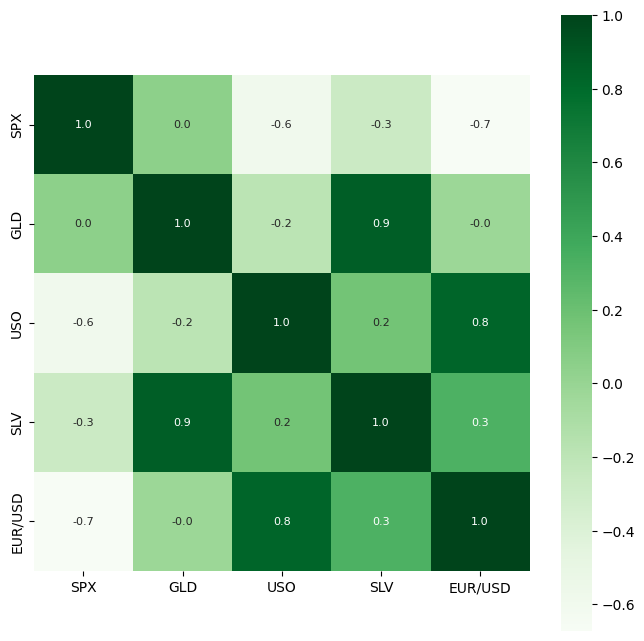

In [16]:
#constructing heatmap to understand the correlation
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt ='.1f', annot = True,annot_kws={'size':8},cmap='Greens')

In [17]:
#Correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-18-3dd386ae89eb>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='red')


<Axes: xlabel='GLD', ylabel='Density'>

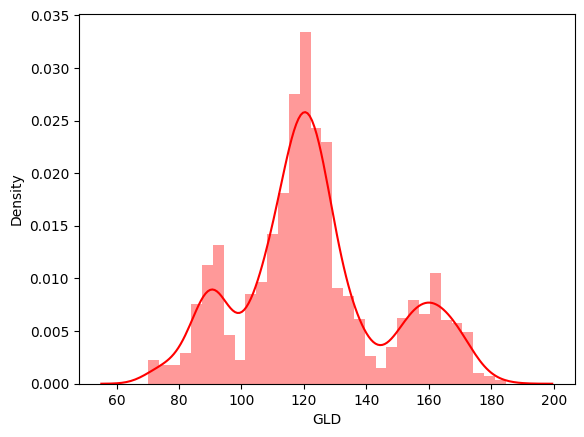

In [18]:
#Check the distribution of the Gold Price
sns.distplot(gold_data['GLD'],color='red')

Splitting the features and target

In [20]:
X = gold_data.drop(['Date', 'GLD'], axis=1)
Y = gold_data['GLD']

In [21]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [22]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


Splitting the training and test data

In [23]:
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [26]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(2290, 4)
(1832, 4)
(458, 4)


Model Training:

Random Forest Regressor

In [28]:
regressor = RandomForestRegressor(n_estimators=100)

In [29]:
#training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [30]:
#Prediction on test data
test_data_prediction = regressor.predict(X_test)

In [31]:
print(test_data_prediction)

[168.47689914  82.31849982 116.21110007 127.49930049 120.67410175
 154.61499785 150.42559826 126.11760061 117.53029882 126.1700005
 116.88010094 171.99580107 142.1703995  168.02619869 115.26939979
 117.40750025 141.09000293 170.19610098 159.72380334 156.6939995
 155.10849966 125.34110001 176.43559993 157.53000308 125.18400014
  93.78799943  77.64770027 120.46139992 119.12449927 167.33879976
  88.26670059 125.48110025  90.9675007  117.65990019 121.07409909
 136.5860012  115.57780096 115.1483009  146.74359989 107.30060105
 104.0942022   87.15919795 126.38890048 118.21860013 153.67729921
 119.6732001  108.36859963 108.20079803  93.24210036 127.21059763
  75.12780009 113.6194994  121.22509987 111.3399998  118.78169893
 120.61409952 159.01660088 167.66290103 147.14639739  86.01519856
  94.34920033  86.75319889  90.49270011 119.00920083 126.45130039
 127.54200012 170.52009976 122.22349954 117.35039915  98.62840059
 168.85400131 143.30779849 132.26530232 121.07560187 121.01189957
 119.7098001

In [36]:
#R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print('R squared error:', error_score)

R squared error: 0.9888934060003551


Compare the actual values and predicted values in a plot

In [37]:
Y_test = list(Y_test)

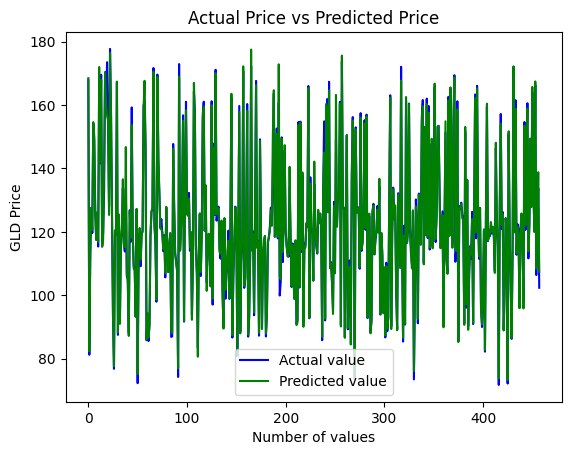

In [38]:
plt.plot(Y_test, color = 'blue', label = 'Actual value')
plt.plot(test_data_prediction, color = 'green', label = 'Predicted value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()